----------------------------

In [1]:
import os
import shutil
from image_loader import LoadImage
from image_preprocesser import PreprocessImage

### **Create the directories**

In [7]:
#Set the directory with the folders fracture and nofracture
base_path = "../1-Data/ml-dp"

#Create the directories train, validation and test
train_dir = os.path.join(base_path, "train")
os.mkdir(train_dir)
val_dir = os.path.join(base_path, "val")
os.mkdir(val_dir)
test_dir = os.path.join(base_path, "test")
os.mkdir(test_dir)

#Create the directories fracture and no fracture in train, valiadtion and test directories
train_fracture_dir = os.path.join(train_dir, "fracture")
os.mkdir(train_fracture_dir)
train_nofracture_dir = os.path.join(train_dir, "nofracture")
os.mkdir(train_nofracture_dir)
val_fracture_dir = os.path.join(val_dir, "fracture")
os.mkdir(val_fracture_dir)
val_nofracture_dir = os.path.join(val_dir, "nofracture")
os.mkdir(val_nofracture_dir)
test_fracture_dir = os.path.join(test_dir, "fracture")
os.mkdir(test_fracture_dir)
test_nofracture_dir = os.path.join(test_dir, "nofracture")
os.mkdir(test_nofracture_dir)

In [10]:
#Print the length of fracture and nofracture directories
fracture = "../1-Data/ml-dp/fracture"
nofracture = "../1-Data/ml-dp/nofracture"

fraction_fracture = 0.8 * len(os.listdir(fracture))
print("Number of fracture's images in train:", 0.8 * fraction_fracture)
print("Number of fracture's images in validation:", 0.2 * fraction_fracture)
print("Number of fracture's images in test:", 0.2 * len(os.listdir(fracture)))

fraction_nofracture = 0.8 * len(os.listdir(nofracture))
print("Number of nofracture's images in train:", 0.8 * fraction_nofracture)
print("Number of nofracture's images in validation:", 0.2 * fraction_nofracture)
print("Number of nofracture's images in test:", 0.2 * len(os.listdir(nofracture)))


Number of fracture's images in train: 1238.4
Number of fracture's images in validation: 309.6
Number of fracture's images in test: 387.0
Number of nofracture's images in train: 1217.2800000000002
Number of nofracture's images in validation: 304.32000000000005
Number of nofracture's images in test: 380.40000000000003


In [11]:
#Copy images from one directory to another
fnames = [i for i in os.listdir("../1-Data/ml-dp/fracture")[0:1238]]
for fname in fnames:
  src = os.path.join(fracture ,fname)
  dst = os.path.join(train_fracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/fracture")[1238:1548]]
for fname in fnames:
  src = os.path.join(fracture ,fname)
  dst = os.path.join(val_fracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/fracture")[1548:]]
for fname in fnames:
  src = os.path.join(fracture ,fname)
  dst = os.path.join(test_fracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/nofracture")[0:1217]]
for fname in fnames:
  src = os.path.join(nofracture ,fname)
  dst = os.path.join(train_nofracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/nofracture")[1217:1522]]
for fname in fnames:
  src = os.path.join(nofracture ,fname)
  dst = os.path.join(val_nofracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/nofracture")[1522:]]
for fname in fnames:
  src = os.path.join(nofracture ,fname)
  dst = os.path.join(test_nofracture_dir, fname)
  shutil.copyfile(src,dst)

### **Loading and Plotting Images**

Number of images: 2455


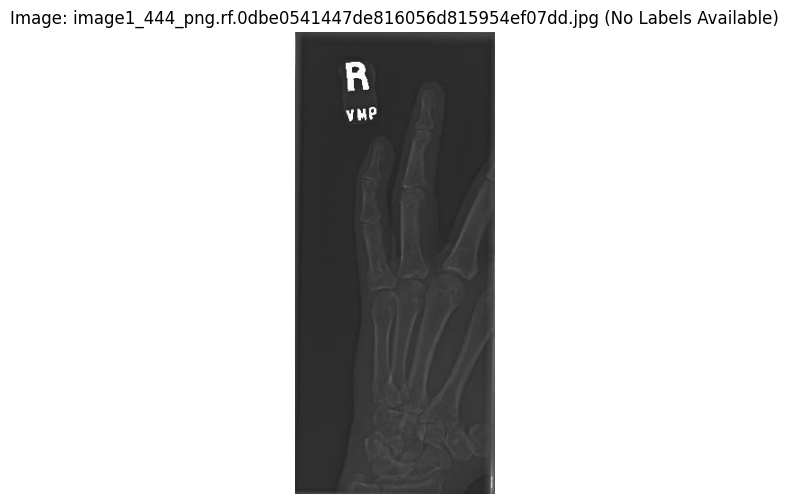

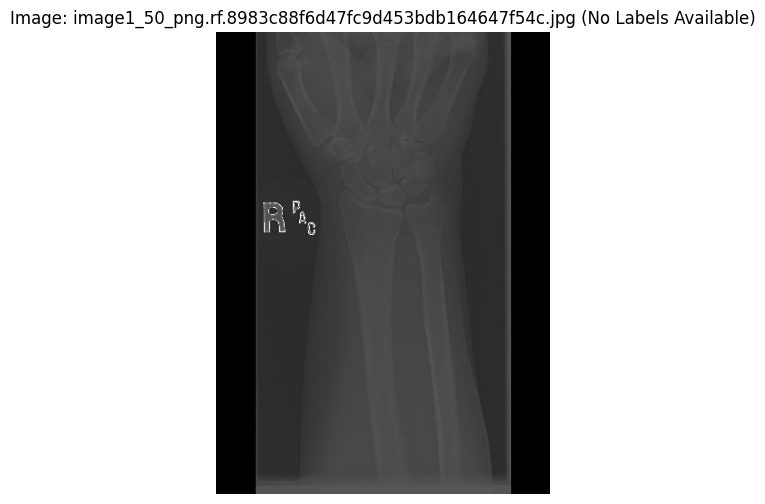

In [5]:
#train_dir = "../1-Data/ml-dp/train"
loader = LoadImage(train_dir)

images_train = loader.images
names_train = loader.names

print(f"Number of images: {len(images_train)}") 
loader.plot_images_with_bboxes() 

Number of images: 615


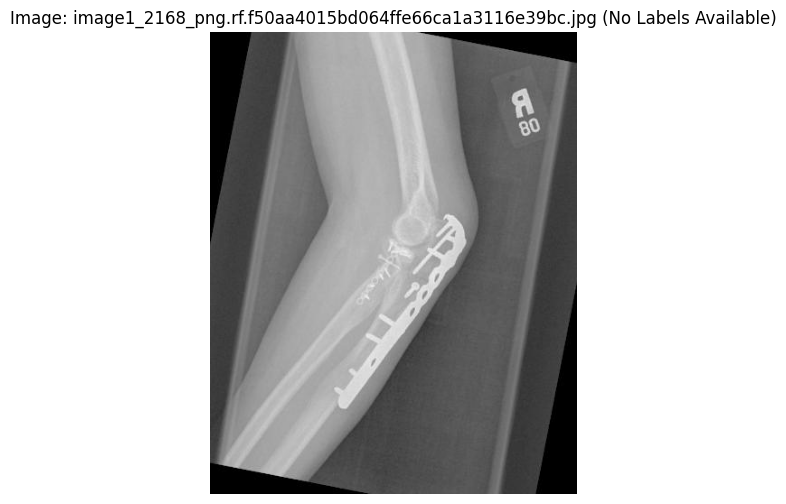

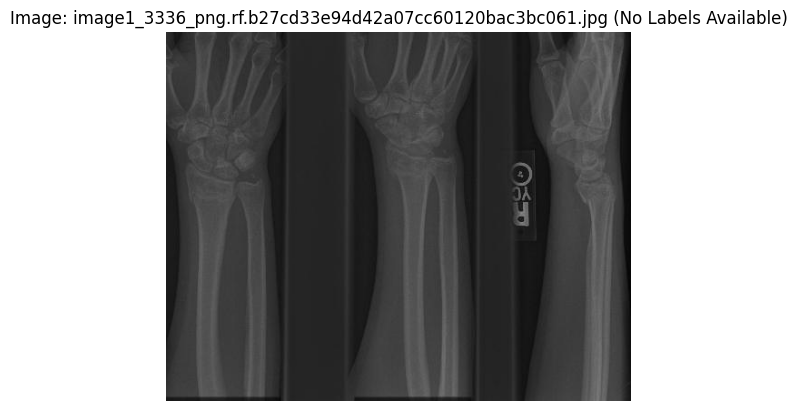

In [11]:
#val_dir = "../1-Data/ml-dp/val"
loader = LoadImage(val_dir)

images_val = loader.images
names_val = loader.names

print(f"Number of images: {len(images_val)}") 
loader.plot_images_with_bboxes() 

Number of images: 767


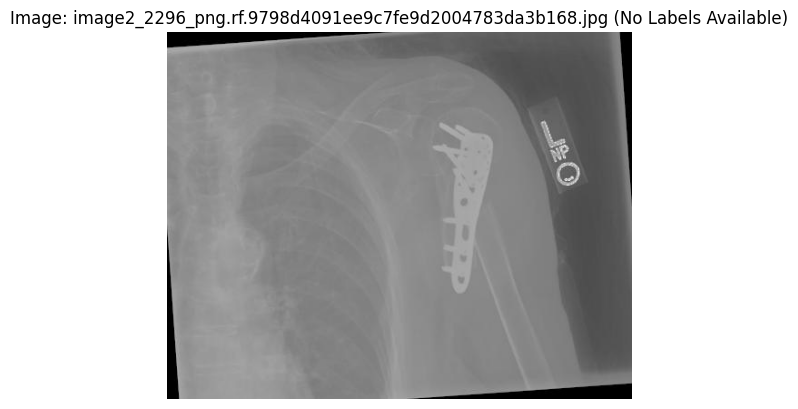

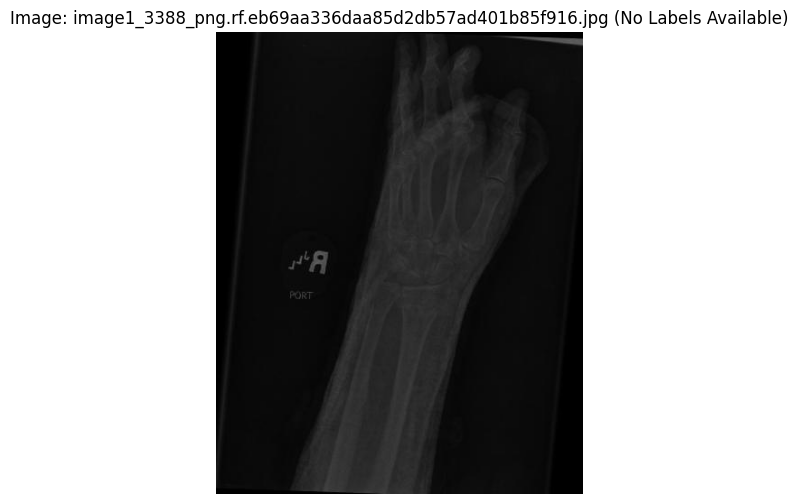

In [10]:
#test_dir = "../1-Data/ml-dp/test"
loader = LoadImage(test_dir)

images_test = loader.images
names_test = loader.names

print(f"Number of images: {len(images_test)}") 
loader.plot_images_with_bboxes() 

loader = LoadImage(image_path='/ruta/a/imagenes', label_path='/ruta/a/labels')

### **Preprocessing images**

In [ ]:
#Train
preprocessor = PreprocessImage(images_train)
resized_images_train, _ = preprocessor.resize_images_and_labels() #_ indicates that we don't have labels

resized_preprocessor_train = PreprocessImage(resized_images_train)
gray_images_train = resized_preprocessor_train.convert_to_grayscale()

normalized_preprocessor_train = PreprocessImage(gray_images_train)
normalized_images_train = normalized_preprocessor_train.normalize_images()

#Validation
preprocessor = PreprocessImage(images_val)
resized_images_val, _ = preprocessor.resize_images_and_labels() 

resized_preprocessor_val = PreprocessImage(resized_images_val)
gray_images_val = resized_preprocessor_val.convert_to_grayscale()

normalized_preprocessor_val = PreprocessImage(gray_images_val)
normalized_images_val = normalized_preprocessor_val.normalize_images()

#Test
preprocessor = PreprocessImage(images_test)
resized_images_test, _ = preprocessor.resize_images_and_labels() 

resized_preprocessor_test = PreprocessImage(resized_images_test)
gray_images_test = resized_preprocessor_test.convert_to_grayscale()

normalized_preprocessor_test = PreprocessImage(gray_images_test)
normalized_images_test = normalized_preprocessor_test.normalize_images()

preprocessor = PreprocessImage(images, labels)
resized_images, labels = preprocessor.resize_images_and_labels()